# Librerías

Primero instalamos e importamos las librerías que utilizaremos para la implementación de nuestro sistema de recomendación.

In [ ]:
# Descomentar para instalar
#!pip install lenskit

In [1]:
import pandas as pd
import numpy as np

import random
from random import randint

import matplotlib.pyplot as plt 
%matplotlib inline 


### Cargamos todos los datos como DataFrames, para poder manejarlos mejor.

Usuarios:

In [2]:
users = pd.read_csv('datasets_finales/usuarios.csv', encoding='utf-8', sep=';') 
users = users[users.rating >= 5]
users

,user,gender,anime_id,rating
0,bigboots,Female,1292,9.0
1,bigboots,Female,13709,8.0
2,bigboots,Female,2251,10.0
3,bigboots,Female,1535,5.0
4,bigboots,Female,223,9.0
...,...,...,...,...
1079489,Alanford,Male,1195,10.0
1079490,Alanford,Male,11319,10.0
1079491,Alanford,Male,1840,10.0
1079661,OSKVAJ,Male,36259,10.0


Female users:

In [3]:
female_users = users[users.gender == 'Female']
female_users = female_users.drop(['gender'], axis=1)
female_users

,user,anime_id,rating
0,bigboots,1292,9.0
1,bigboots,13709,8.0
2,bigboots,2251,10.0
3,bigboots,1535,5.0
4,bigboots,223,9.0
...,...,...,...
554687,kaapow,37396,6.0
554688,kaapow,38826,10.0
554689,kaapow,2236,7.0
554690,kaapow,22319,8.0


Male users:

In [4]:
male_users = users[users.gender == 'Male']
male_users = male_users.drop(['gender'], axis=1)
male_users

,user,anime_id,rating
554692,rodrigosap,1292,8.0
554693,rodrigosap,269,10.0
554694,rodrigosap,1575,8.0
554695,rodrigosap,1535,10.0
554696,rodrigosap,223,10.0
...,...,...,...
1079489,Alanford,1195,10.0
1079490,Alanford,11319,10.0
1079491,Alanford,1840,10.0
1079661,OSKVAJ,36259,10.0



### Combinamos las bases de datos de animes con la de ratings

In [5]:
animes = pd.read_csv("datasets_finales/animes.csv", sep = ";")

In [6]:
animes.columns = ['anime_id','name','rating','genre','type','studios','producers','licensors','voice_actors']

In [7]:
female_result = pd.merge(animes, female_users, how='left', on='anime_id')
female_result = female_result.dropna()
female_result

,anime_id,name,rating_x,genre,type,studios,producers,licensors,voice_actors,user,rating_y
0,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"['Action', 'Military', 'Adventure', 'Comedy', ...",['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']","['Park, Romi', 'Kugimiya, Rie']",DangerTrix,10.0
1,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"['Action', 'Military', 'Adventure', 'Comedy', ...",['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']","['Park, Romi', 'Kugimiya, Rie']",-Yle,10.0
2,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"['Action', 'Military', 'Adventure', 'Comedy', ...",['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']","['Park, Romi', 'Kugimiya, Rie']",karinaxknight,8.0
3,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"['Action', 'Military', 'Adventure', 'Comedy', ...",['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']","['Park, Romi', 'Kugimiya, Rie']",neesaan,10.0
4,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"['Action', 'Military', 'Adventure', 'Comedy', ...",['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']","['Park, Romi', 'Kugimiya, Rie']",primpingbunny,10.0
...,...,...,...,...,...,...,...,...,...,...,...
407239,1639,Boku no Pico,4.43,OVA,"['Hentai', 'Yaoi']","['Sugar Boy', 'Blue Cat']",['Natural High'],[None],"['Sakou, Mariko', None]",MichaelisShiroi,7.0
407240,1639,Boku no Pico,4.43,OVA,"['Hentai', 'Yaoi']","['Sugar Boy', 'Blue Cat']",['Natural High'],[None],"['Sakou, Mariko', None]",Foxxxylady,10.0
407241,1639,Boku no Pico,4.43,OVA,"['Hentai', 'Yaoi']","['Sugar Boy', 'Blue Cat']",['Natural High'],[None],"['Sakou, Mariko', None]",Barenshiamonten,5.0
407242,1639,Boku no Pico,4.43,OVA,"['Hentai', 'Yaoi']","['Sugar Boy', 'Blue Cat']",['Natural High'],[None],"['Sakou, Mariko', None]",frogboiler,10.0


In [8]:
male_result = pd.merge(animes, female_users, how='left', on='anime_id')
male_result = male_result.dropna()
male_result

,anime_id,name,rating_x,genre,type,studios,producers,licensors,voice_actors,user,rating_y
0,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"['Action', 'Military', 'Adventure', 'Comedy', ...",['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']","['Park, Romi', 'Kugimiya, Rie']",DangerTrix,10.0
1,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"['Action', 'Military', 'Adventure', 'Comedy', ...",['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']","['Park, Romi', 'Kugimiya, Rie']",-Yle,10.0
2,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"['Action', 'Military', 'Adventure', 'Comedy', ...",['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']","['Park, Romi', 'Kugimiya, Rie']",karinaxknight,8.0
3,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"['Action', 'Military', 'Adventure', 'Comedy', ...",['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']","['Park, Romi', 'Kugimiya, Rie']",neesaan,10.0
4,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"['Action', 'Military', 'Adventure', 'Comedy', ...",['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']","['Park, Romi', 'Kugimiya, Rie']",primpingbunny,10.0
...,...,...,...,...,...,...,...,...,...,...,...
407239,1639,Boku no Pico,4.43,OVA,"['Hentai', 'Yaoi']","['Sugar Boy', 'Blue Cat']",['Natural High'],[None],"['Sakou, Mariko', None]",MichaelisShiroi,7.0
407240,1639,Boku no Pico,4.43,OVA,"['Hentai', 'Yaoi']","['Sugar Boy', 'Blue Cat']",['Natural High'],[None],"['Sakou, Mariko', None]",Foxxxylady,10.0
407241,1639,Boku no Pico,4.43,OVA,"['Hentai', 'Yaoi']","['Sugar Boy', 'Blue Cat']",['Natural High'],[None],"['Sakou, Mariko', None]",Barenshiamonten,5.0
407242,1639,Boku no Pico,4.43,OVA,"['Hentai', 'Yaoi']","['Sugar Boy', 'Blue Cat']",['Natural High'],[None],"['Sakou, Mariko', None]",frogboiler,10.0




Ahora pasamos el formato lista a string de nuestras columnas objetivo.

In [9]:
# pasamos el formato lista a string de las mujeres
a = female_result.values

j=0
for j in range(len(a)):
  a[j][4] = a[j][4].replace('\'','').replace('[','').replace(']','').replace('"','')
  a[j][5] = a[j][5].replace('\'','').replace('[','').replace(']','').replace('"','')
  a[j][6] = a[j][6].replace('\'','').replace('[','').replace(']','').replace('"','')
  a[j][7] = a[j][7].replace('\'','').replace('[','').replace(']','').replace('"','')
  a[j][8] = a[j][8].replace('\'','').replace('[','').replace(']','').replace('"','')
  j+=1

In [10]:
keys=['item', 'name', 'rating_x', 'genre', 'type', 'studios', 'producers',
       'licensors', 'voice_actors', 'user_name', 'rating']

female_df = pd.DataFrame(a, columns=keys)

In [11]:
# pasamos el formato lista a string de los hombres
b = male_result.values

j=0
for j in range(len(b)):
  b[j][4] = b[j][4].replace('\'','').replace('[','').replace(']','').replace('"','')
  b[j][5] = b[j][5].replace('\'','').replace('[','').replace(']','').replace('"','')
  b[j][6] = b[j][6].replace('\'','').replace('[','').replace(']','').replace('"','')
  b[j][7] = b[j][7].replace('\'','').replace('[','').replace(']','').replace('"','')
  b[j][8] = b[j][8].replace('\'','').replace('[','').replace(']','').replace('"','')
  j+=1

In [12]:
keys=['item', 'name', 'rating_x', 'genre', 'type', 'studios', 'producers',
       'licensors', 'voice_actors', 'user_name', 'rating']

male_df = pd.DataFrame(b, columns=keys)

Agregamos id de usuario a nuestro dataset, este irá en la columna user.

In [13]:
# Agregamos id de usuario a mujeres
female_df['user'] = female_df[['user_name']].sum(axis=1).map(hash)
female_df['user'] = female_df.groupby(['user']).ngroup()
female_df

,item,name,rating_x,genre,type,studios,producers,licensors,voice_actors,user_name,rating,user
0,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",DangerTrix,10,1151
1,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",-Yle,10,3592
2,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",karinaxknight,8,2357
3,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",neesaan,10,3298
4,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",primpingbunny,10,5321
...,...,...,...,...,...,...,...,...,...,...,...,...
402103,1639,Boku no Pico,4.43,OVA,"Hentai, Yaoi","Sugar Boy, Blue Cat",Natural High,None,"Sakou, Mariko, None",MichaelisShiroi,7,1343
402104,1639,Boku no Pico,4.43,OVA,"Hentai, Yaoi","Sugar Boy, Blue Cat",Natural High,None,"Sakou, Mariko, None",Foxxxylady,10,283
402105,1639,Boku no Pico,4.43,OVA,"Hentai, Yaoi","Sugar Boy, Blue Cat",Natural High,None,"Sakou, Mariko, None",Barenshiamonten,5,5710
402106,1639,Boku no Pico,4.43,OVA,"Hentai, Yaoi","Sugar Boy, Blue Cat",Natural High,None,"Sakou, Mariko, None",frogboiler,10,5107


In [14]:
# Agregamos id de usuario a hombres
male_df['user'] = male_df[['user_name']].sum(axis=1).map(hash)
male_df['user'] = male_df.groupby(['user']).ngroup()
male_df

,item,name,rating_x,genre,type,studios,producers,licensors,voice_actors,user_name,rating,user
0,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",DangerTrix,10,1151
1,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",-Yle,10,3592
2,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",karinaxknight,8,2357
3,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",neesaan,10,3298
4,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",primpingbunny,10,5321
...,...,...,...,...,...,...,...,...,...,...,...,...
402103,1639,Boku no Pico,4.43,OVA,"Hentai, Yaoi","Sugar Boy, Blue Cat",Natural High,None,"Sakou, Mariko, None",MichaelisShiroi,7,1343
402104,1639,Boku no Pico,4.43,OVA,"Hentai, Yaoi","Sugar Boy, Blue Cat",Natural High,None,"Sakou, Mariko, None",Foxxxylady,10,283
402105,1639,Boku no Pico,4.43,OVA,"Hentai, Yaoi","Sugar Boy, Blue Cat",Natural High,None,"Sakou, Mariko, None",Barenshiamonten,5,5710
402106,1639,Boku no Pico,4.43,OVA,"Hentai, Yaoi","Sugar Boy, Blue Cat",Natural High,None,"Sakou, Mariko, None",frogboiler,10,5107


Ya con el dataset listo, comenzamos a usar la libería para obtener nuestras recomendaciones.

In [15]:
from lenskit import batch, topn, util
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, als, item_knn as knn
from lenskit.algorithms import user_knn as uknn
from lenskit import topn

Nos aseguramos que nuestros atributos sean de tipo int para el correcto funcionamiento del algoritmo

In [16]:
female_df['rating'] = female_df['rating'].astype(int)
female_df['user'] = female_df['user'].astype(int)
female_df['item'] = female_df['item'].astype(int)

In [17]:
male_df['rating'] = male_df['rating'].astype(int)
male_df['user'] = male_df['user'].astype(int)
male_df['item'] = male_df['item'].astype(int)




Nuestros datasets principales se llamarán male_ratings y female_ratings

In [58]:
female_ratings = female_df
female_ratings.head()

,item,name,rating_x,genre,type,studios,producers,licensors,voice_actors,user_name,rating,user
0,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",DangerTrix,10,1151
1,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",-Yle,10,3592
2,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",karinaxknight,8,2357
3,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",neesaan,10,3298
4,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",primpingbunny,10,5321


In [59]:
male_ratings = male_df
male_ratings.head()

,item,name,rating_x,genre,type,studios,producers,licensors,voice_actors,user_name,rating,user
0,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",DangerTrix,10,1151
1,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",-Yle,10,3592
2,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",karinaxknight,8,2357
3,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",neesaan,10,3298
4,5114,Fullmetal Alchemist: Brotherhood,9.22,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America","Park, Romi, Kugimiya, Rie",primpingbunny,10,5321


Desde la librería utilizaremos el algoritmo de KNN-items con k = 10, KNN-users con k = 4 y ALS con features = 50

In [60]:
algo_item_female = knn.ItemItem(10)
algo_item_male = knn.ItemItem(10)
algo_user_female = uknn.UserUser(4)
algo_user_male = uknn.UserUser(4)
algo_als_female = als.BiasedMF(50) 
algo_als_male = als.BiasedMF(50)

In [61]:
def eval(aname, algo, train, test):
  '''
  Función para entrenar el algoritmo y guardar recomendaciones.
  '''
  fittable = util.clone(algo)
  fittable = Recommender.adapt(fittable)
  fittable.fit(train)
  users = test.user.unique()
  # now we run the recommender
  recs = batch.recommend(fittable, users, 100)
  # add the algorithm name for analyzability
  recs['Algorithm'] = aname
  return recs

Como el algoritmo debe vectorizar una gran cantidad de datos, utilizamos una muestra, de esta manera el entrenamiento será menos costoso

In [62]:
female_ratings = female_ratings.sample(5000)
male_ratings = male_ratings.sample(5000)

A continuación entrenamos los modelos utilizando la función eval()

In [63]:
# Entrenamos para mujeres
female_all_recs = []
female_test_data = []
female_train_data = []
for train, test in xf.partition_users(female_ratings[['user', 'item', 'rating']], 5, xf.
  SampleFrac(0.2)):
    female_train_data.append(train)
    female_test_data.append(test)
    female_all_recs.append(eval('ItemItem', algo_item_female, train, test))
    female_all_recs.append(eval('ALS', algo_als_female, train, test))
    female_all_recs.append(eval('UserUser', algo_user_female, train, test))

using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best res

In [64]:
# # Entrenamos para hombres
male_all_recs = []
male_test_data = []
male_train_data = []
for train, test in xf.partition_users(male_ratings[['user', 'item', 'rating']], 5, xf.
  SampleFrac(0.2)):
    male_train_data.append(train)
    male_test_data.append(test)
    male_all_recs.append(eval('ItemItem', algo_item_male, train, test))
    male_all_recs.append(eval('ALS', algo_als_male, train, test))
    male_all_recs.append(eval('UserUser', algo_user_male, train, test))

using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best results
using multiprocessing.Pool, upgrade to Python 3.7 for best res

Con los modelos entrenados, comenzamos a predecir

In [65]:
from lenskit.batch import predict
from lenskit.metrics.predict import rmse
from lenskit.metrics.predict import mae

In [66]:
# Predicción con knn-item para mujeres
algo_item_female.fit(female_ratings)
female_item_preds = predict(algo_item_female, female_ratings)
female_item_preds.head()

using multiprocessing.Pool, upgrade to Python 3.7 for best results


,item,name,rating_x,genre,type,studios,producers,licensors,voice_actors,user_name,rating,user,prediction
282326,32696,Fukigen na Mononokean (The Morose Mononokean),7.42,TV,"Comedy, Demons, Supernatural",Pierrot Plus,"Square Enix, AT-X, Age Global Networks, Docomo...","Funimation, Crunchyroll","Maeno, Tomoaki, Kaji, Yuki",Daysi,6,1279,NaN
372679,37964,Mayonaka no Occult Koumuin (Midnight occult ci...,6.73,TV,"Demons, Fantasy, Mystery, Shoujo, Supernatural",LIDENFILMS,None,Funimation,"Toki, Shunichi, Fukuyama, Jun, Irino, Miyu, Yu...",ginstella,6,4440,6.236842
154651,934,Higurashi no Naku Koro ni (When They Cry),7.97,TV,"Mystery, Dementia, Horror, Psychological, Supe...",Studio Deen,"Geneon Universal Entertainment, Frontier Works...","Sentai Filmworks, Geneon Entertainment USA","Nakahara, Mai, Tamura, Yukari, Yukino, Satsuki...",flandur,8,3901,8.169222
216596,39597,Sword Art Online: Alicization - War of Underworld,7.68,TV,"Action, Game, Adventure, Romance, Fantasy",A-1 Pictures,"Aniplex, Bandai Namco Entertainment, Egg Firm,...",Aniplex of America,"Matsuoka, Yoshitsugu, Tomatsu, Haruka, Kayano, Ai",rvcvb,8,1964,NaN
50312,2251,Baccano!,8.42,TV,"Action, Comedy, Historical, Mystery, Supernatural",Brains Base,"Aniplex, Sakura Create, Happinet Pictures","Funimation, Aniplex of America","Morita, Masakazu, Onosaka, Masaya, Aoki, Sayak...",Pam3,8,5226,7.335202


In [67]:
# Predicción con knn-item para hombres
algo_item_male.fit(male_ratings)
male_item_preds = predict(algo_item_male, male_ratings)
male_item_preds.head()

using multiprocessing.Pool, upgrade to Python 3.7 for best results


,item,name,rating_x,genre,type,studios,producers,licensors,voice_actors,user_name,rating,user,prediction
400550,3375,Kirepapa.,6.72,OVA,"Comedy, Drama, Romance, Yaoi",A.C.G.T.,"ANIK, PrimeTime, On-Lead",None,"Sakurai, Takahiro, Midorikawa, Hikaru",Wattacukor,9,4696,10.567850
103998,4107,Tengen Toppa Gurren Lagann Movie 1: Gurren-hen,8.17,Movie,"Action, Comedy, Mecha",Gainax,Aniplex,Aniplex of America,"Konishi, Katsuyuki, Kakihara, Tetsuya, Inoue, ...",Sinkarth,10,3900,NaN
302185,35262,Boku no Hero Academia 2nd Season: Hero Note,7.32,Special,"Action, Comedy, Super Power",Bones,None,Funimation,"Watanabe, Akeno, Miyake, Kenta",rasenkai7,10,5440,10.500000
174655,15809,Hataraku Maou-sama! (The Devil is a Part-Timer!),7.84,TV,"Comedy, Demons, Supernatural, Romance, Fantasy",White Fox,"Sotsu, Lantis, Pony Canyon, Magic Capsule, Inf...",Funimation,"Osaka, Ryota, Hikasa, Yoko, Ono, Yuuki, Touyam...",zerojeon,6,4623,6.402033
69781,28171,Shokugeki no Souma (Food Wars! Shokugeki no Soma),8.33,TV,"Ecchi, School, Shounen",J.C.Staff,"Dentsu, Frontier Works, Mainichi Broadcasting ...",Sentai Filmworks,"Matsuoka, Yoshitsugu, Taneda, Risa, Takahashi,...",StrawberryJam23,8,2926,NaN


In [68]:
# Predicción con als para mujeres
algo_als_female.fit(female_ratings)
female_als_preds = predict(algo_als_female, female_ratings)
female_als_preds.head()

using multiprocessing.Pool, upgrade to Python 3.7 for best results


,item,name,rating_x,genre,type,studios,producers,licensors,voice_actors,user_name,rating,user,prediction
282326,32696,Fukigen na Mononokean (The Morose Mononokean),7.42,TV,"Comedy, Demons, Supernatural",Pierrot Plus,"Square Enix, AT-X, Age Global Networks, Docomo...","Funimation, Crunchyroll","Maeno, Tomoaki, Kaji, Yuki",Daysi,6,1279,6.033604
372679,37964,Mayonaka no Occult Koumuin (Midnight occult ci...,6.73,TV,"Demons, Fantasy, Mystery, Shoujo, Supernatural",LIDENFILMS,None,Funimation,"Toki, Shunichi, Fukuyama, Jun, Irino, Miyu, Yu...",ginstella,6,4440,5.997972
154651,934,Higurashi no Naku Koro ni (When They Cry),7.97,TV,"Mystery, Dementia, Horror, Psychological, Supe...",Studio Deen,"Geneon Universal Entertainment, Frontier Works...","Sentai Filmworks, Geneon Entertainment USA","Nakahara, Mai, Tamura, Yukari, Yukino, Satsuki...",flandur,8,3901,7.656790
216596,39597,Sword Art Online: Alicization - War of Underworld,7.68,TV,"Action, Game, Adventure, Romance, Fantasy",A-1 Pictures,"Aniplex, Bandai Namco Entertainment, Egg Firm,...",Aniplex of America,"Matsuoka, Yoshitsugu, Tomatsu, Haruka, Kayano, Ai",rvcvb,8,1964,8.003827
50312,2251,Baccano!,8.42,TV,"Action, Comedy, Historical, Mystery, Supernatural",Brains Base,"Aniplex, Sakura Create, Happinet Pictures","Funimation, Aniplex of America","Morita, Masakazu, Onosaka, Masaya, Aoki, Sayak...",Pam3,8,5226,7.542897


In [69]:
# Predicción con als para hombres
algo_als_male.fit(male_ratings)
male_als_preds = predict(algo_als_male, male_ratings)
male_als_preds.head()

using multiprocessing.Pool, upgrade to Python 3.7 for best results


,item,name,rating_x,genre,type,studios,producers,licensors,voice_actors,user_name,rating,user,prediction
400550,3375,Kirepapa.,6.72,OVA,"Comedy, Drama, Romance, Yaoi",A.C.G.T.,"ANIK, PrimeTime, On-Lead",None,"Sakurai, Takahiro, Midorikawa, Hikaru",Wattacukor,9,4696,9.377781
103998,4107,Tengen Toppa Gurren Lagann Movie 1: Gurren-hen,8.17,Movie,"Action, Comedy, Mecha",Gainax,Aniplex,Aniplex of America,"Konishi, Katsuyuki, Kakihara, Tetsuya, Inoue, ...",Sinkarth,10,3900,10.119690
302185,35262,Boku no Hero Academia 2nd Season: Hero Note,7.32,Special,"Action, Comedy, Super Power",Bones,None,Funimation,"Watanabe, Akeno, Miyake, Kenta",rasenkai7,10,5440,10.383588
174655,15809,Hataraku Maou-sama! (The Devil is a Part-Timer!),7.84,TV,"Comedy, Demons, Supernatural, Romance, Fantasy",White Fox,"Sotsu, Lantis, Pony Canyon, Magic Capsule, Inf...",Funimation,"Osaka, Ryota, Hikasa, Yoko, Ono, Yuuki, Touyam...",zerojeon,6,4623,5.616658
69781,28171,Shokugeki no Souma (Food Wars! Shokugeki no Soma),8.33,TV,"Ecchi, School, Shounen",J.C.Staff,"Dentsu, Frontier Works, Mainichi Broadcasting ...",Sentai Filmworks,"Matsuoka, Yoshitsugu, Taneda, Risa, Takahashi,...",StrawberryJam23,8,2926,7.982497


In [70]:
# Predicción con knn-user para mujeres
algo_user_female.fit(female_ratings)
female_user_preds = predict(algo_user_female, female_ratings)
female_user_preds.head()

using multiprocessing.Pool, upgrade to Python 3.7 for best results


,item,name,rating_x,genre,type,studios,producers,licensors,voice_actors,user_name,rating,user,prediction
282326,32696,Fukigen na Mononokean (The Morose Mononokean),7.42,TV,"Comedy, Demons, Supernatural",Pierrot Plus,"Square Enix, AT-X, Age Global Networks, Docomo...","Funimation, Crunchyroll","Maeno, Tomoaki, Kaji, Yuki",Daysi,6,1279,6.201221
372679,37964,Mayonaka no Occult Koumuin (Midnight occult ci...,6.73,TV,"Demons, Fantasy, Mystery, Shoujo, Supernatural",LIDENFILMS,None,Funimation,"Toki, Shunichi, Fukuyama, Jun, Irino, Miyu, Yu...",ginstella,6,4440,5.500000
154651,934,Higurashi no Naku Koro ni (When They Cry),7.97,TV,"Mystery, Dementia, Horror, Psychological, Supe...",Studio Deen,"Geneon Universal Entertainment, Frontier Works...","Sentai Filmworks, Geneon Entertainment USA","Nakahara, Mai, Tamura, Yukari, Yukino, Satsuki...",flandur,8,3901,NaN
216596,39597,Sword Art Online: Alicization - War of Underworld,7.68,TV,"Action, Game, Adventure, Romance, Fantasy",A-1 Pictures,"Aniplex, Bandai Namco Entertainment, Egg Firm,...",Aniplex of America,"Matsuoka, Yoshitsugu, Tomatsu, Haruka, Kayano, Ai",rvcvb,8,1964,NaN
50312,2251,Baccano!,8.42,TV,"Action, Comedy, Historical, Mystery, Supernatural",Brains Base,"Aniplex, Sakura Create, Happinet Pictures","Funimation, Aniplex of America","Morita, Masakazu, Onosaka, Masaya, Aoki, Sayak...",Pam3,8,5226,NaN


In [72]:
# Predicción con knn-user para hombres
algo_user_male.fit(male_ratings)
male_user_preds = predict(algo_user_male, male_ratings)
male_user_preds.head()

using multiprocessing.Pool, upgrade to Python 3.7 for best results


,item,name,rating_x,genre,type,studios,producers,licensors,voice_actors,user_name,rating,user,prediction
400550,3375,Kirepapa.,6.72,OVA,"Comedy, Drama, Romance, Yaoi",A.C.G.T.,"ANIK, PrimeTime, On-Lead",None,"Sakurai, Takahiro, Midorikawa, Hikaru",Wattacukor,9,4696,NaN
103998,4107,Tengen Toppa Gurren Lagann Movie 1: Gurren-hen,8.17,Movie,"Action, Comedy, Mecha",Gainax,Aniplex,Aniplex of America,"Konishi, Katsuyuki, Kakihara, Tetsuya, Inoue, ...",Sinkarth,10,3900,NaN
302185,35262,Boku no Hero Academia 2nd Season: Hero Note,7.32,Special,"Action, Comedy, Super Power",Bones,None,Funimation,"Watanabe, Akeno, Miyake, Kenta",rasenkai7,10,5440,10.833333
174655,15809,Hataraku Maou-sama! (The Devil is a Part-Timer!),7.84,TV,"Comedy, Demons, Supernatural, Romance, Fantasy",White Fox,"Sotsu, Lantis, Pony Canyon, Magic Capsule, Inf...",Funimation,"Osaka, Ryota, Hikasa, Yoko, Ono, Yuuki, Touyam...",zerojeon,6,4623,NaN
69781,28171,Shokugeki no Souma (Food Wars! Shokugeki no Soma),8.33,TV,"Ecchi, School, Shounen",J.C.Staff,"Dentsu, Frontier Works, Mainichi Broadcasting ...",Sentai Filmworks,"Matsuoka, Yoshitsugu, Taneda, Risa, Takahashi,...",StrawberryJam23,8,2926,NaN


#### Obtenemos los errores de las predicciones

In [73]:
# Errores para mujeres
print("Female pretictions metrics KNN - item")
print("RMSE:",rmse(female_item_preds['prediction'], female_item_preds['rating']))
print("MAE:",mae(female_item_preds['prediction'], female_item_preds['rating']))
print()
print("Female pretictions metrics KNN - user")
print("RMSE:",rmse(female_user_preds['prediction'], female_user_preds['rating']))
print("MAE:",mae(female_user_preds['prediction'], female_user_preds['rating']))
print()
print("Female pretictions metrics ALS")
print("RMSE:",rmse(female_als_preds['prediction'], female_als_preds['rating']))
print("MAE:",mae(female_als_preds['prediction'], female_als_preds['rating']))

Female pretictions metrics KNN - item
RMSE: 0.8146272481790133
MAE: 0.6402446082963905

Female pretictions metrics KNN - user
RMSE: 0.8046702027348016
MAE: 0.6291598935425503

Female pretictions metrics ALS
RMSE: 0.2583800850639511
MAE: 0.19196223228638304


In [74]:
# Errores para hombres
print("Male pretictions metrics KNN . item")
print("RMSE:",rmse(male_item_preds['prediction'], male_item_preds['rating']))
print("MAE:",mae(male_item_preds['prediction'], male_item_preds['rating']))
print()
print("Male pretictions metrics KNN - user")
print("RMSE:",rmse(male_user_preds['prediction'], male_user_preds['rating']))
print("MAE:",mae(male_user_preds['prediction'], male_user_preds['rating']))
print()
print("Male pretictions metrics ALS")
print("RMSE:",rmse(male_als_preds['prediction'], male_als_preds['rating']))
print("MAE:",mae(male_als_preds['prediction'], male_als_preds['rating']))

Male pretictions metrics KNN . item
RMSE: 0.8471946865170318
MAE: 0.6613178125863329

Male pretictions metrics KNN - user
RMSE: 0.7853978771110146
MAE: 0.5844008860521214

Male pretictions metrics ALS
RMSE: 0.24853128776363798
MAE: 0.18690899770643982


In [75]:
# Recomendaciones para mujeres
female_all_recs = pd.concat(female_all_recs, ignore_index=True)
female_all_recs.head(10)

,item,score,user,rank,Algorithm
0,11771,8.687500,51,1,ItemItem
1,16782,8.095238,51,2,ItemItem
2,853,7.534050,51,3,ItemItem
3,17513,7.416667,51,4,ItemItem
4,23289,7.161616,51,5,ItemItem
5,13601,7.119658,51,6,ItemItem
6,202,6.933333,51,7,ItemItem
7,11759,6.888889,51,8,ItemItem
8,31859,5.933333,51,9,ItemItem
9,31722,5.888889,51,10,ItemItem


In [76]:
# Recomendaciones para hombres
male_all_recs = pd.concat(male_all_recs, ignore_index=True)
male_all_recs.head(10)

,item,score,user,rank,Algorithm
0,39195,8.071429,40,1,ItemItem
1,28171,7.904762,40,2,ItemItem
2,4725,7.821429,40,3,ItemItem
3,21405,7.771429,40,4,ItemItem
4,578,7.071429,40,5,ItemItem
5,2236,6.933333,40,6,ItemItem
6,4752,6.571429,40,7,ItemItem
7,21353,5.500000,40,8,ItemItem
8,31478,8.437500,77,1,ItemItem
9,199,8.339080,77,2,ItemItem


Vemos todas las recomendaciones generadas por el algoritmo

In [79]:
female_all_recs

,item,score,user,rank,Algorithm
0,11771,8.687500,51,1,ItemItem
1,16782,8.095238,51,2,ItemItem
2,853,7.534050,51,3,ItemItem
3,17513,7.416667,51,4,ItemItem
4,23289,7.161616,51,5,ItemItem
...,...,...,...,...,...
69266,31552,8.000000,6512,3,UserUser
69267,1369,7.000000,6512,4,UserUser
69268,33743,7.000000,6512,5,UserUser
69269,10092,6.750000,6512,6,UserUser


In [80]:
male_all_recs

,item,score,user,rank,Algorithm
0,39195,8.071429,40,1,ItemItem
1,28171,7.904762,40,2,ItemItem
2,4725,7.821429,40,3,ItemItem
3,21405,7.771429,40,4,ItemItem
4,578,7.071429,40,5,ItemItem
...,...,...,...,...,...
70762,8142,4.500000,6468,4,UserUser
70763,154,9.166667,6508,1,UserUser
70764,372,8.166667,6508,2,UserUser
70765,4087,8.000000,6508,3,UserUser


In [82]:
female_test_data = pd.concat(female_test_data, ignore_index=True)
male_test_data = pd.concat(male_test_data, ignore_index=True)

Ahora utilizamos la metrica NDCG para evaluar las recomendaciones

In [83]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg)
rla.add_metric(topn.precision)

In [84]:
female_results = rla.compute(female_all_recs, female_test_data)
female_results.head()

nrecs      ndcg  precision
Algorithm user                            
ALS       2     100.0  0.163151       0.01
          28    100.0  0.000000       0.00
          38    100.0  0.000000       0.00
          43    100.0  0.000000       0.00
          51    100.0  0.000000       0.00

In [85]:
female_results

nrecs      ndcg  precision
Algorithm user                            
ALS       2     100.0  0.163151       0.01
          28    100.0  0.000000       0.00
          38    100.0  0.000000       0.00
          43    100.0  0.000000       0.00
          51    100.0  0.000000       0.00
...               ...       ...        ...
UserUser  6475   13.0  0.000000       0.00
          6491    4.0  0.000000       0.00
          6493    3.0  0.000000       0.00
          6512    7.0  0.000000       0.00
          6515    9.0  0.000000       0.00

[1593 rows x 3 columns]

In [86]:
male_results = rla.compute(male_all_recs, male_test_data)
male_results.head()

nrecs  ndcg  precision
Algorithm user                        
ALS       18    100.0   0.0        0.0
          21    100.0   0.0        0.0
          25    100.0   0.0        0.0
          28    100.0   0.0        0.0
          40    100.0   0.0        0.0

In [87]:
male_results

nrecs  ndcg  precision
Algorithm user                        
ALS       18    100.0   0.0        0.0
          21    100.0   0.0        0.0
          25    100.0   0.0        0.0
          28    100.0   0.0        0.0
          40    100.0   0.0        0.0
...               ...   ...        ...
UserUser  6490    3.0   0.0        0.0
          6491    9.0   0.0        0.0
          6500    8.0   0.0        0.0
          6508    4.0   0.0        0.0
          6538    5.0   0.0        0.0

[1611 rows x 3 columns]

De esta forma obtenemos el resumen de los resultados para nDGC y precision

In [88]:
female_results.groupby('Algorithm').ndcg.mean()

Algorithm
ALS         0.029190
ItemItem    0.010109
UserUser    0.001109
Name: ndcg, dtype: float64

In [89]:
female_results.groupby('Algorithm').precision.mean()

Algorithm
ALS         0.001175
ItemItem    0.002490
UserUser    0.000443
Name: precision, dtype: float64

In [90]:
male_results.groupby('Algorithm').ndcg.mean()

Algorithm
ALS         0.028983
ItemItem    0.012375
UserUser    0.002364
Name: ndcg, dtype: float64

In [91]:
male_results.groupby('Algorithm').precision.mean()

Algorithm
ALS         0.001216
ItemItem    0.001872
UserUser    0.000591
Name: precision, dtype: float64

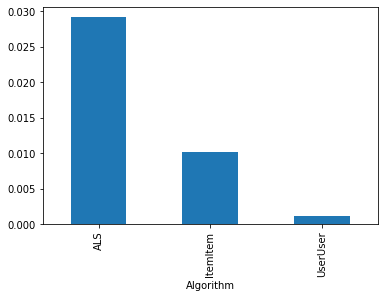

In [92]:
female_results.groupby('Algorithm').ndcg.mean().plot.bar()

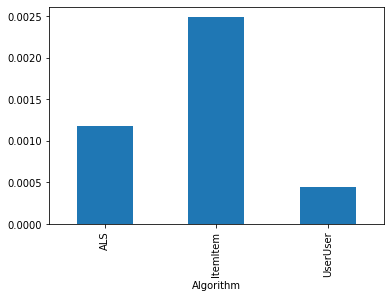

In [93]:
female_results.groupby('Algorithm').precision.mean().plot.bar()

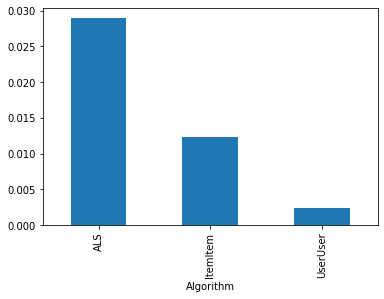

In [94]:
male_results.groupby('Algorithm').ndcg.mean().plot.bar()

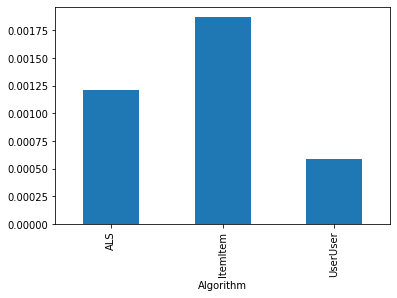

In [95]:
male_results.groupby('Algorithm').precision.mean().plot.bar()